# Amortization Table Pandas Exercise

In [9]:
%matplotlib inline 

from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The objective of this exercise is to get you familiar with pandas and numpy syntax while also helping you a little in personal finance.
An amortization table describes the process of paying down credit card or any other financial debt. It is useful to look at to consider how much you are currently paying each month, how long to get completely rid of debt, and how much money you save in the long run.
There are many complicated debt instruments out there, but we will look at one of the more simpler cases which should be a good starting point.

We will be constructing an amortization table assuming a fixed APR (annual percentage rate - very like interest rate) with fixed monthly payments and a fixed amount of financial debt. The process is described below:

Start with \$10,000 in financial debt with an APR of 14% and a fixed monthly payment of \$400:

In [10]:
debt = 10000
apr = 0.14
monthly_payment = 400

After one month, you pay a fixed total of \$400. Some fraction of this will be used to pay off your interest:

In [11]:
apr_per_month = apr/12
interest = debt*apr_per_month
debt_paid_down = monthly_payment - interest
debt = debt - debt_paid_down
debt

9716.666666666666

After another month, you do this again:

In [12]:
interest = debt*apr_per_month
debt_paid_down = monthly_payment - interest
debt = debt - debt_paid_down
debt

9430.027777777777

This can easily be turned into a function:

In [29]:
def generateAmortRow(debt,apr,monthly_payment):
	apr_per_month = apr/12
	interest = debt*apr_per_month
	debt_paid_down = monthly_payment - interest
	updated_debt = debt - debt_paid_down
    
	return updated_debt

generateAmortRow(10000,0.14,400)

9716.666666666666

But this isn't exactly useful - We need a full table and this is where DataFrames are useful.

DataFrames are like matrices than can store many different kinds of data with convenient functions readily available to them. They can be constructed from a variety of methods - a dictionary, list, or Series. In our case, we will use a dictionary:


In [14]:
def generateAmortRow(debt,apr,monthly_payment):
	apr_per_month = apr/12
	interest = debt*apr_per_month
	debt_paid_down = monthly_payment - interest
	updated_debt = debt - debt_paid_down
	row = {'debt_left': updated_debt, 'payment_to_debt': debt_paid_down, 'payment_to_interest': interest}
	return row

DataFrame(generateAmortRow(10000,0.14,400),index=[0]) #An index is required to give a row label to the DataFrame

,debt_left,payment_to_debt,payment_to_interest
0,9716.666667,283.333333,116.666667


Great, now that we have a row, we need to iteratively do this a bunch of times until the debt balance reaches 0 and we can concatenate each row together to form our table. To do this, much like initializing an array, let's first initialize an empty DataFrame.

In [16]:
amort_table = DataFrame()

We can set our initial variables here:

In [17]:
debt = 10000
apr = 0.14
monthly_payment = 400
index = 0 #to keep track of our row label

And our while loop:

In [18]:
while debt > 0:
	next_row = DataFrame(generateAmortRow(debt,apr,monthly_payment),index=[index])
	amort_table = pd.concat([amort_table,next_row],axis=0) #pd.concat with axis set to 0 appends two dataframes by row
	
	#Update parameters
	debt = next_row.debt_left[index]
	index += 1

In [19]:
amort_table.shape #Dimensions of our DataFrame

(30, 3)

In [20]:
amort_table.head()

,debt_left,payment_to_debt,payment_to_interest
0,9716.666667,283.333333,116.666667
1,9430.027778,286.638889,113.361111
2,9140.044769,289.983009,110.016991
3,8846.678624,293.366144,106.633856
4,8549.889875,296.788749,103.211251


Last row needs adjusting:

In [21]:
amort_table.tail()

,debt_left,payment_to_debt,payment_to_interest
25,1451.673045,378.646275,21.353725
26,1068.609230,383.063814,16.936186
27,681.076338,387.532892,12.467108
28,289.022228,392.054109,7.945891
29,-107.605846,396.628074,3.371926


In [22]:
payment_to_debt = amort_table.iloc[amort_table.shape[0]-2,0]
last_debt_balance = 0

amort_table.loc[amort_table.shape[0]-1,'debt_left'] = last_debt_balance
amort_table.loc[amort_table.shape[0]-1,'payment_to_debt'] = payment_to_debt

amort_table.tail()

,debt_left,payment_to_debt,payment_to_interest
25,1451.673045,378.646275,21.353725
26,1068.609230,383.063814,16.936186
27,681.076338,387.532892,12.467108
28,289.022228,392.054109,7.945891
29,0.000000,289.022228,3.371926


Let's also add three new columns: the monthly payment, the cumulative sum of payments to interest, and the cumulative sum of payments to everything.

In [23]:
amort_table['monthly_payment'] = amort_table['payment_to_debt'] + amort_table['payment_to_interest']
amort_table['cumulative_interest_paid'] = amort_table['payment_to_interest'].cumsum()
amort_table['cumulative_paid_total'] = amort_table['monthly_payment'].cumsum()

amort_table.head()

,debt_left,payment_to_debt,payment_to_interest,monthly_payment,cumulative_interest_paid,cumulative_paid_total
0,9716.666667,283.333333,116.666667,400.0,116.666667,400.0
1,9430.027778,286.638889,113.361111,400.0,230.027778,800.0
2,9140.044769,289.983009,110.016991,400.0,340.044769,1200.0
3,8846.678624,293.366144,106.633856,400.0,446.678624,1600.0
4,8549.889875,296.788749,103.211251,400.0,549.889875,2000.0


And finally, we can plot how much you pay in interest over time as well as the steady decline in the amount of debt you have:

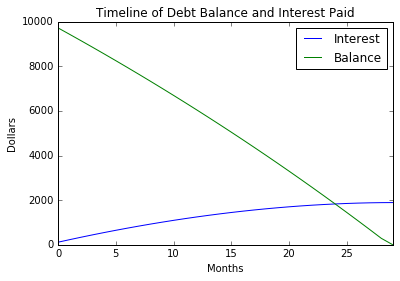

In [26]:
amort_table['cumulative_interest_paid'].plot()
amort_table['debt_left'].plot()

#Add a title, labels, and a legend too:
plt.title("Timeline of Debt Balance and Interest Paid")
plt.xlabel("Months")
plt.ylabel("Dollars")
plt.legend(labels=['Interest','Balance'])

Below is everything we've done to make the table but all wrapped in a function:

In [27]:
def generateAmortTable(Debt,Apr,Monthly_payment):
	amort_table = DataFrame()

	debt = Debt
	apr = Apr
	monthly_payment = Monthly_payment
	index = 0 #to keep track of our row label

	#And our while loop:
	while debt > 0:
		next_row = DataFrame(generateAmortRow(debt,apr,monthly_payment),index=[index])
		amort_table = pd.concat([amort_table,next_row],axis=0) #pd.concat with axis set to 0 appends two dataframes by row
		
		#Update parameters
		debt = next_row.debt_left[index]
		index += 1

	payment_to_debt = amort_table.iloc[amort_table.shape[0]-2,0]
	last_debt_balance = 0

	amort_table.loc[amort_table.shape[0]-1,'debt_left'] = last_debt_balance
	amort_table.loc[amort_table.shape[0]-1,'payment_to_debt'] = payment_to_debt

	amort_table['monthly_payment'] = amort_table['payment_to_debt'] + amort_table['payment_to_interest']
	amort_table['cumulative_interest_paid'] = amort_table['payment_to_interest'].cumsum()
	amort_table['cumulative_paid_total'] = amort_table['monthly_payment'].cumsum()

	return amort_table

Now you can use this to refinance your credit card or student debt and see how much time and money you save!

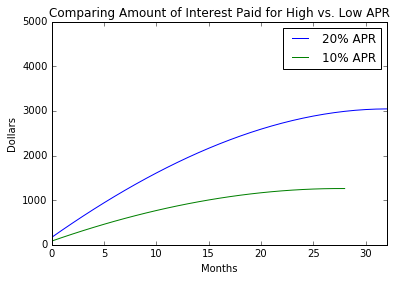

In [28]:
high_apr = generateAmortTable(10000,0.2,400)
low_apr = generateAmortTable(10000,0.1,400)

high_apr['cumulative_interest_paid'].plot()
low_apr['cumulative_interest_paid'].plot()
plt.legend(labels=['20% APR', '10% APR'])
plt.title("Comparing Amount of Interest Paid for High vs. Low APR")
plt.xlabel("Months")
plt.ylabel("Dollars")
plt.ylim((0,5000))
plt.show()